Make the notebook wider (if you think this makes the notebook look prettier)

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Import the library with all predefine functions

In [1]:
import lazy_pipeline as lpipe

Check library versions

In [2]:
from platform import python_version
import sklearn
print(python_version())
print(lpipe.pd.__version__)
print(sklearn.__version__)

3.8.16
1.3.5
1.0.2


Run seamlessly on 
* python = 3.9.13, 
* pandas = 1.5.1
* scikit-learn = 1.1.3

# Prepare the data

Load data

In [3]:
df = lpipe.load_data('adult')

print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Binarize data

In [5]:
y_name = 'Class'


In [6]:
#Replace category with True and False
d= {'<=50K': True, '>50K': False}

df = df.replace({y_name: {'<=50K': True, '>50K': False}},regex=True)

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,True


In [8]:
#To make work faster let's take only small proprion of data
df_sample = df.sample(1000, random_state=42)

In [9]:
y = df_sample[y_name]
X = lpipe.binarize_X(df_sample.drop(y_name, axis=1))
print(X.shape)
X.head()

(1000, 1263)


,age: 17,age: 18,age: 19,age: 20,age: 21,age: 22,age: 23,age: 24,age: 25,age: 26,...,native-country: Japan,native-country: Mexico,native-country: Philippines,native-country: Poland,native-country: Puerto-Rico,native-country: Scotland,native-country: South,native-country: Taiwan,native-country: Trinadad&Tobago,native-country: United-States
14160,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
27048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
28868,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5667,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7827,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Shuffle the data to drop any initial ordering of rows. For example, if the dataset is constructed first from all positive examples and then all negative examples.

_NB: Skip this step if your data is sequential and rows ordering is important. For example, if your dataset contains a "date" feature._

In [10]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]  # Order y to follow the order of rows from X

Represent data $X$ as list of subsets of attributes to better suit the theory.

In [11]:
X

,age: 17,age: 18,age: 19,age: 20,age: 21,age: 22,age: 23,age: 24,age: 25,age: 26,...,native-country: Japan,native-country: Mexico,native-country: Philippines,native-country: Poland,native-country: Puerto-Rico,native-country: Scotland,native-country: South,native-country: Taiwan,native-country: Trinadad&Tobago,native-country: United-States
9658,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3601,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
16055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
27844,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
25499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8082,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
27825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [12]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'age: 57',
 'capital-gain: 0',
 'capital-loss: 0',
 'education-num: 2',
 'education:  1st-4th',
 'fnlwgt: 121821',
 'hours-per-week: 40',
 'marital-status:  Married-civ-spouse',
 'native-country:  Dominican-Republic',
 'occupation:  Other-service',
 'race:  Other',
 'relationship:  Husband',
 'sex:  Male',
 'workclass:  Private'}

And, for being consisted, convert $y$ to list too.

In [13]:
y = y.values.tolist()

Assume that at the very begining, we know the labels only for the first 20% of rows.

In [14]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(100, 900)

Set up the test target labels $y$

In [15]:
y_test = y[n_train:]

# Make predictions

Make predictions and measure time required to obtain these predictions

In [16]:
%%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 1000/1000 [00:43<00:00, 20.85it/s]

CPU times: user 42.2 s, sys: 271 ms, total: 42.5 s
Wall time: 43.2 s


In [17]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 1000/1000 [00:01<00:00, 646.29it/s]

CPU times: user 1.34 s, sys: 10.1 ms, total: 1.35 s
Wall time: 1.4 s


**Popular models**
Let's compare result with popular models, such as decision tree, random forest

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier( random_state=42)
clf_forest = clf_forest.fit(X_train, y_train)
y_pred_forest = clf_forest.predict(X_test)

Evaluate predictions

Here we decided to measure Accuracy and F1 score simply because there ones of the most popular scores. Feel free to use more elaborate scorings.

In [18]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

In [25]:
#Check models scores
score_vals_models = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__+"_descision_tree"
    preds = y_pred
    score_vals_models[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + 'random_forest'
    preds = y_pred_forest
    score_vals_models[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

# Analyze results

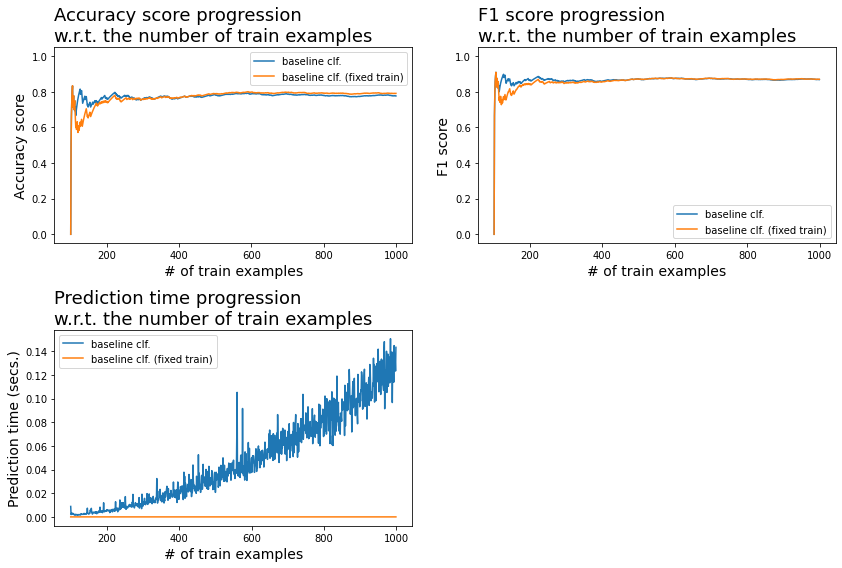

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples',  size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(),  size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

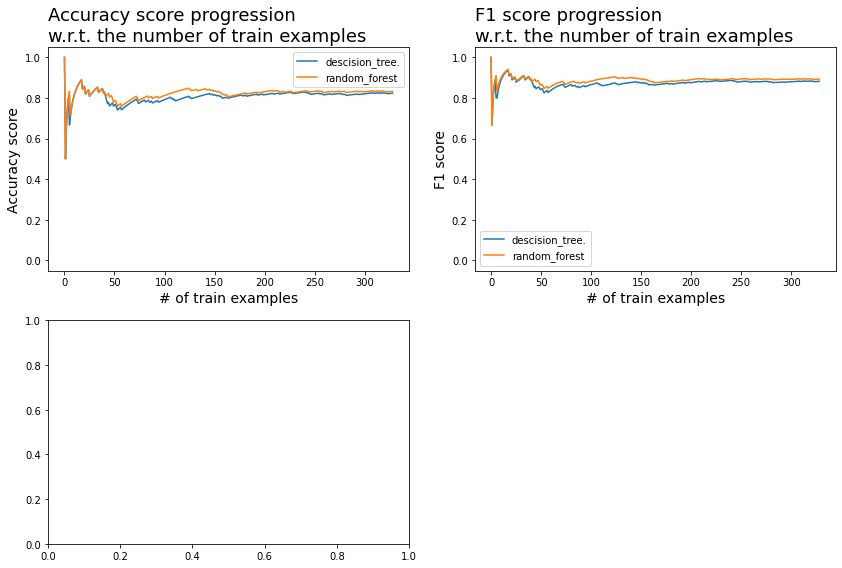

In [32]:
#Check models results
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot( score_vals_models[t+"_descision_tree"], label='descision_tree.')
    ax.plot( score_vals_models[t+'random_forest'], label='random_forest')
    

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples',  size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(),  size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison_ model.png')
plt.show()

The data in the df_sample is unbalanced, so you need to look at the F_score result

In [21]:
df_sample['Class'].value_counts()

True     745
False    255
Name: Class, dtype: int64

In conclusion:

It can be seen that random forest performs better than all 3 algorithms, although decision tree is not far behind. Lazy_fca is in the same range of values as the two known algorithms, but the final result is lower (about 5%). This can be connected to the fact that the algorithm has not been optimised and there is room for improvement.